In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import datetime as dt
import requests

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [24.0, 16.0]

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
API_URL = 'https://api.iextrading.com/1.0'
STOCK = 'ALL'

res = requests.get(f'{API_URL}/stock/{STOCK}/chart/5y')
data = res.json()
df = pd.DataFrame(data)

df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df['date'], df['close'], test_size=0.3, random_state=43)

Text(0.5, 1.0, 'Training Set')

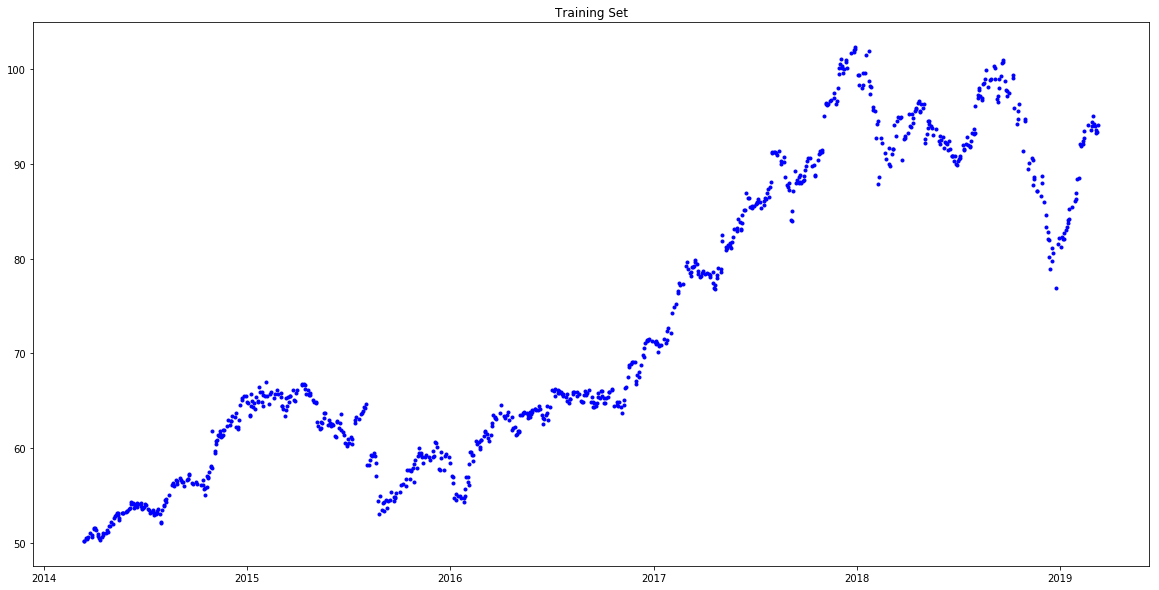

In [5]:
plt.figure(figsize=(20,10))
plt.plot(X_train, Y_train, 'bo', markersize=3)
plt.title('Training Set')

Text(0.5, 1.0, 'Testing Set')

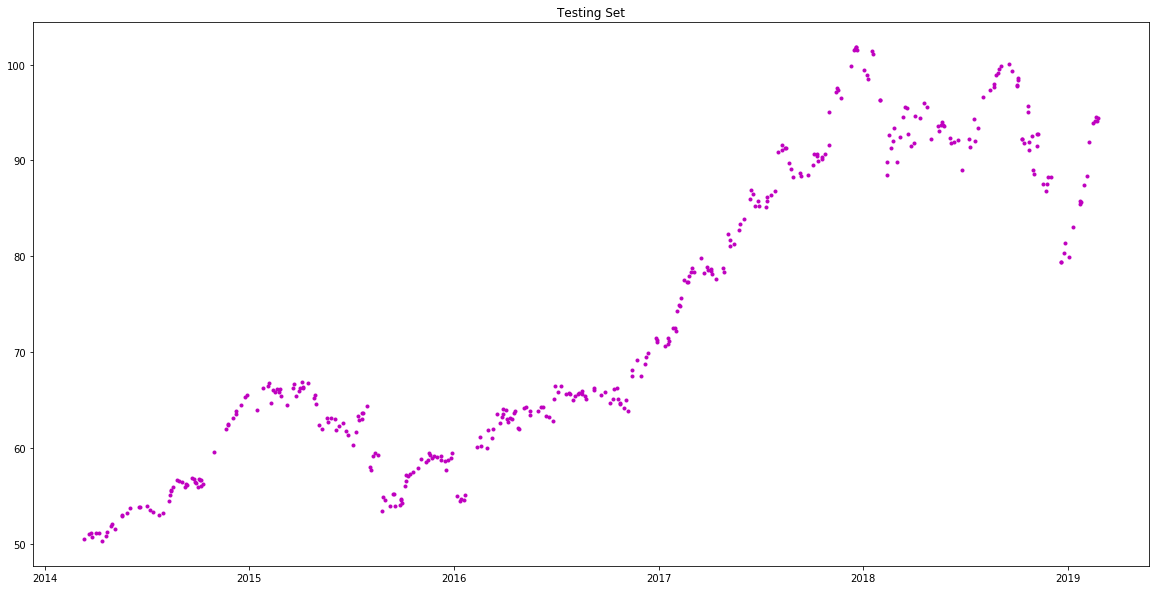

In [6]:
plt.figure(figsize=(20,10))
plt.plot(X_test, Y_test, 'mo', markersize=3)
plt.title('Testing Set')

In [7]:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 10)

X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

/home/milo/.local/share/virtualenvs/data_analysis-1ek1L9II/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: The fit may be poorly conditioned
  """


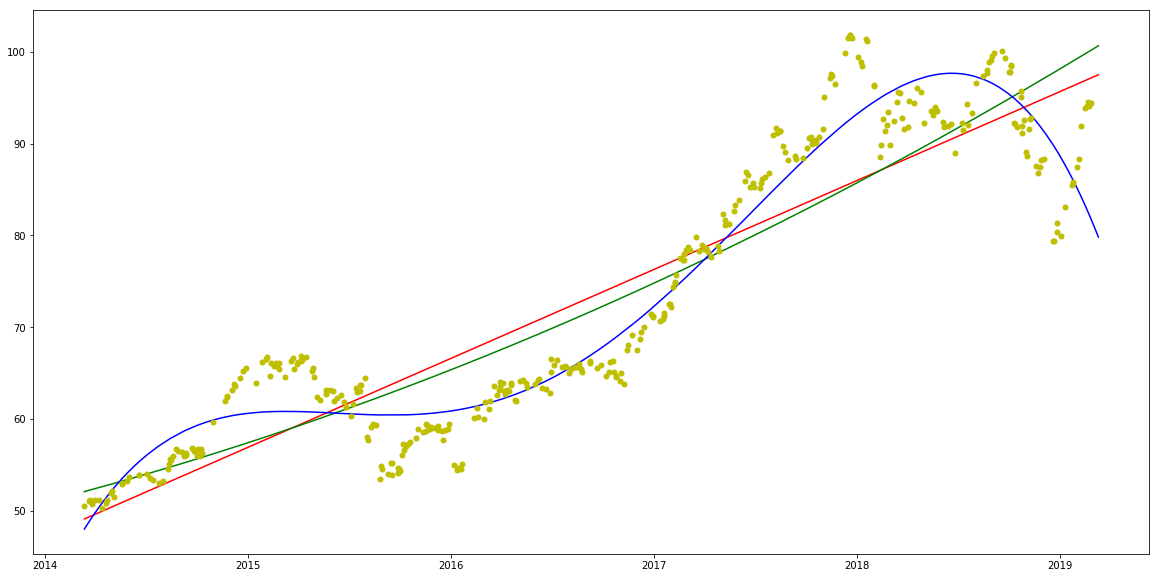

In [8]:
plt.figure(figsize=(20,10))
#plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_ln, 'r')
plt.plot(X_line, ffit_sq, 'g')
plt.plot(X_line, ffit_ten, 'b')

plt.plot(X_test, Y_test, 'yo', markersize=5)